In [114]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [115]:
base_dir = 'C:\\Users\\aaa\\DatasetLivrable1\\Livrable1'

In [116]:
#définir les dimensions

img_height = 50
img_width = 50
batch_size = 32

In [117]:
#récupérer les données dans directory et les séparer en données d"entrainement (80%) et données de test (20%)

train_set, test_set = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=  0.2,
  subset =  "both",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 41407 files belonging to 5 classes.
Using 33126 files for training.
Using 8281 files for validation.


In [119]:
#mettre les images et les labels dans des array qui sont des tensor

images_train, labels_train = next(iter(train_set))
images_test, labels_test = next(iter(test_set))

In [120]:
type(images_train)

tensorflow.python.framework.ops.EagerTensor

In [121]:
#transformer en numpy

X_train = images_train.numpy()
X_test = images_test.numpy()

In [122]:
type(X_train)

numpy.ndarray

In [123]:
#Récupérer les classes dans une variables

class_names = train_set.class_names

In [124]:
#récupérer chaque image et label dans un tableau , et on rassemble images ensemble et label ensemble

images, labels = [], []
for image_batch, label_batch in train_set:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

for image_batch, label_batch in test_set:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

In [125]:
#créer un tableau de numpy pour pouvoir les applatir

images = np.array(images)
labels = np.array(labels)

In [126]:
# applatir les X

X = images.reshape(images.shape[0], -1)
Y = labels

In [127]:
X.shape

(41407, 7500)

In [128]:
print("X shape : {}".format(str(X.shape)))
print("Y shape : {}".format(str(Y.shape)))

X shape : (41407, 7500)
Y shape : (41407,)


In [129]:
from sklearn.decomposition import PCA

In [130]:
#Appliquer PCA pour réduire les dimensions

pca = PCA()

In [131]:
#Appliquer le fit_transform pour réduire les dimensions

XPCA = pca.fit_transform(X)

In [132]:
XPCA.shape

(41407, 7500)

In [133]:

from sklearn.model_selection import train_test_split

In [134]:
from xgboost import XGBClassifier

In [135]:
class_names

['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']

In [136]:
#binairiser les classes

Binary_Y = Y
Binary_Y[Binary_Y != 1] = 0

In [137]:
# apprentissage avec XGBoost
X_train, X_test, y_train, y_test = train_test_split(XPCA,Binary_Y, test_size=0.2)
bst = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
learningScoreXGB = bst.score(X_train, y_train)
generalizationScoreXGB = bst.score(X_test, y_test)
print('Learning score For XGBOOST: '+str(learningScoreXGB))
print('Generalization score For XGBOOST: '+str(generalizationScoreXGB))

Learning score For XGBOOST: 0.9544150943396227
Generalization score For XGBOOST: 0.8225066409079932


In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
# Prédire les classes sur l'ensemble de test
y_pred = bst.predict(X_test)

In [140]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

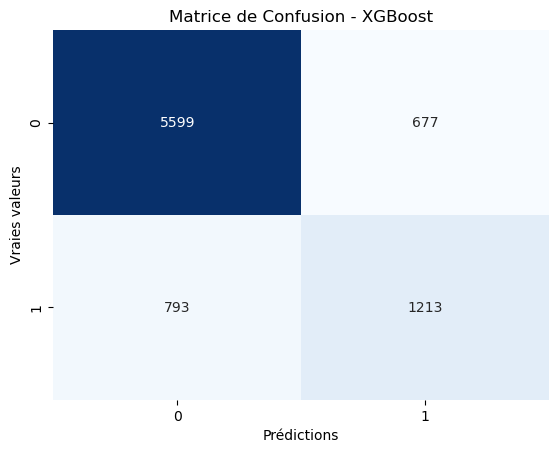

In [141]:
# Afficher la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion - XGBoost")
plt.show()

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

In [144]:
# Afficher l'accuracy
print('Accuracy : {:.2f}%'.format(accuracy * 100))

Accuracy : 82.25%
